In [0]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [69]:
# Load the email sapm dataset.
# The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase.
# Rename spambase.data to spambase.text or spambase.csv.
%%time
email_rec = pd.read_csv("./drive/My Drive/ML_Code/Email Spam Classifier/spambase.txt",  sep = ',', header= None )

CPU times: user 24.7 ms, sys: 3.94 ms, total: 28.7 ms
Wall time: 33 ms


In [70]:
# Rename the columns.
# renaming the columns
email_rec.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(email_rec.head())

   word_freq_make  word_freq_address  ...  capital_run_length_total  spam
0            0.00               0.64  ...                       278     1
1            0.21               0.28  ...                      1028     1
2            0.06               0.00  ...                      2259     1
3            0.00               0.00  ...                       191     1
4            0.00               0.00  ...                       191     1

[5 rows x 58 columns]


In [0]:
# Split a dataset into X and y.
X = email_rec.drop("spam", axis = 1)
y = email_rec.spam.values.astype(int)

In [0]:
# Scale the features. Standardize a dataset.
X_scaled = scale(X)

# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0)

In [0]:
# Radial Basis Function (RBF) kernel SVM.

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [74]:
# Print Confusion Matrix.
%%time
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[787  35]
 [ 72 487]]
CPU times: user 3.34 ms, sys: 0 ns, total: 3.34 ms
Wall time: 3.64 ms


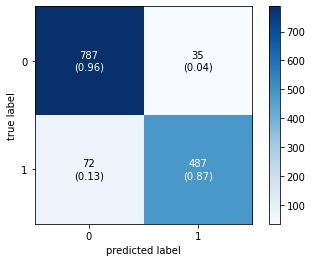

CPU times: user 169 ms, sys: 6.9 ms, total: 176 ms
Wall time: 177 ms


In [76]:
# Plot the confusion matrix.
%%time
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [99]:
# Print accuracy, precision, and recall.
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall/Sensitivity:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9362780593772628
Precision: 0.9418386491557224
Recall/Sensitivity: 0.8980322003577818


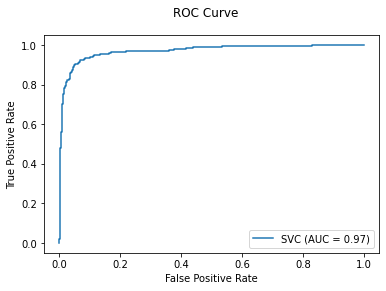

In [79]:
# Plot the ROC curve.
clf_disp = plot_roc_curve(model, X_test, y_test)
clf_disp.figure_.suptitle("ROC Curve")

plt.show()

In [81]:
# Use the Grid Search to Find Optimal hyperparameters.
# Create a KFold object with 10 splits
%%time
folds = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Specify range of hyperparameters.
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# Radial Basis Function (RBF) kernel SVM.
model = SVC(kernel="rbf")

# Set up GridSearchCV() function with the range of hyperparameters.
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.4min finished


CPU times: user 1min 22s, sys: 35.2 ms, total: 1min 22s
Wall time: 1min 22s


In [82]:
# Cross-Validation results.
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.329140,0.004628,0.029405,0.001417,1,0.01,"{'C': 1, 'gamma': 0.01}",0.950311,0.931677,0.931677,0.903727,0.919255,0.959627,0.928571,0.937888,0.947205,0.919255,0.932919,0.015787,5,0.940994,0.944099,0.943754,0.946515,0.946515,0.943409,0.945135,0.944099,0.943409,0.947205,0.944513,0.001772
1,0.441691,0.005401,0.041689,0.000638,1,0.001,"{'C': 1, 'gamma': 0.001}",0.925466,0.903727,0.885093,0.885093,0.903727,0.916149,0.903727,0.900621,0.900621,0.869565,0.899379,0.015227,10,0.902346,0.905107,0.904762,0.906142,0.905107,0.902692,0.905452,0.902001,0.906832,0.912698,0.905314,0.002908
2,0.755141,0.006417,0.071265,0.001897,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.847826,0.807453,0.763975,0.779503,0.804348,0.826087,0.813665,0.804348,0.807453,0.770186,0.802484,0.024184,12,0.799172,0.801932,0.806418,0.806418,0.805383,0.802277,0.799517,0.802277,0.806073,0.807108,0.803658,0.002829
3,0.275429,0.005117,0.022756,0.001415,10,0.01,"{'C': 10, 'gamma': 0.01}",0.962733,0.934783,0.940994,0.916149,0.925466,0.956522,0.937888,0.944099,0.947205,0.909938,0.937578,0.015863,2,0.960663,0.961698,0.962043,0.964458,0.962733,0.960317,0.962043,0.962733,0.962388,0.964113,0.962319,0.001242
4,0.308654,0.006651,0.026997,0.000760,10,0.001,"{'C': 10, 'gamma': 0.001}",0.950311,0.928571,0.928571,0.903727,0.922360,0.950311,0.934783,0.937888,0.931677,0.916149,0.930435,0.013622,7,0.937888,0.939959,0.939959,0.940649,0.940304,0.935818,0.938233,0.937198,0.937543,0.939959,0.938751,0.001545
5,0.444172,0.002830,0.041920,0.000853,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.922360,0.897516,0.881988,0.888199,0.903727,0.909938,0.900621,0.906832,0.897516,0.869565,0.897826,0.014194,11,0.899931,0.900621,0.902001,0.903382,0.903037,0.900621,0.900966,0.899586,0.903382,0.908558,0.902208,0.002499
6,0.319057,0.007482,0.019538,0.000499,100,0.01,"{'C': 100, 'gamma': 0.01}",0.962733,0.925466,0.944099,0.916149,0.919255,0.944099,0.919255,0.940994,0.934783,0.919255,0.932609,0.014503,6,0.980676,0.982402,0.979641,0.981366,0.982057,0.982402,0.978606,0.979986,0.980676,0.979986,0.980780,0.001206
7,0.276790,0.006347,0.020162,0.000391,100,0.001,"{'C': 100, 'gamma': 0.001}",0.959627,0.931677,0.934783,0.913043,0.925466,0.953416,0.944099,0.940994,0.937888,0.928571,0.936957,0.012884,3,0.949965,0.948930,0.950656,0.953071,0.949275,0.950311,0.947895,0.951001,0.951346,0.951001,0.950345,0.001367
8,0.323017,0.007099,0.027298,0.000597,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.953416,0.919255,0.919255,0.909938,0.916149,0.944099,0.931677,0.940994,0.928571,0.909938,0.927329,0.014245,8,0.929607,0.937543,0.933747,0.933057,0.935128,0.928571,0.930642,0.930642,0.932712,0.932022,0.932367,0.002550
9,0.466917,0.022124,0.018199,0.001121,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.947205,0.909938,0.934783,0.897516,0.909938,0.947205,0.928571,0.931677,0.940994,0.894410,0.924224,0.018798,9,0.993099,0.994134,0.992063,0.994824,0.993099,0.993444,0.993099,0.992754,0.992754,0.993444,0.993271,0.000728


In [83]:
# Print the optimal accuracy score and hyperparameters.
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9400621118012422 corresponding to hyperparameters {'C': 1000, 'gamma': 0.001}


In [98]:
# Radial Basis Function (RBF) kernel SVM with the optical hyperparameters.
model = SVC(C=1000, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print accuracy, precision, and recall.
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall/Sensitivity:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9362780593772628
Precision: 0.9418386491557224
Recall/Sensitivity: 0.8980322003577818


In [89]:
# Print Confusion Matrix.
%%time
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[791  31]
 [ 57 502]]
CPU times: user 2.73 ms, sys: 993 µs, total: 3.72 ms
Wall time: 7.14 ms


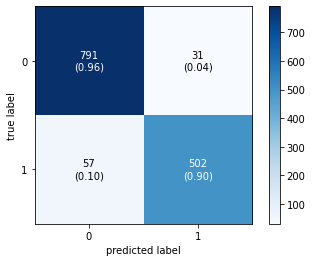

CPU times: user 157 ms, sys: 2.99 ms, total: 160 ms
Wall time: 162 ms


In [90]:
# Plot the confusion matrix.
%%time
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

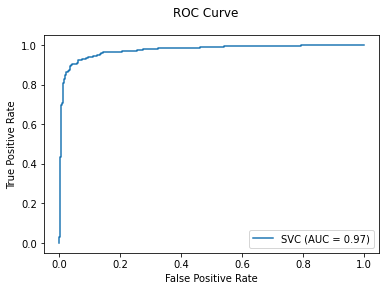

In [96]:
# Plot the ROC curve.
clf_disp = plot_roc_curve(model, X_test, y_test)
clf_disp.figure_.suptitle("ROC Curve")

plt.show()